# **1. (PCA & LDA Principle) Both PCA and LDA are methods for reducing dimensions for meaningful properties of the original data.**

`*a. Please describe PCA*\`

PCA stands for Principal Component Analysis and it is used for data dimensionality reduction while preserving as much structure as possible within the data. The first set of principal components choose the greatest variability in the data and the second set of principal components choose what is left from the first one. It is mostly used for feature extraction by creating a new orientation of axis. Using PCA can not only reduce the dimension of data but also increase the efficiency during training and improve the accuracy of the final result.

`*b. Please describe LDA*`

LDA stands for Linear Discriminant Analysis and it is also used for data dimensionality reduction but aims to maximise separation between means of projected classes and minimise variance within each projected class. It is mostly used for feature selection and the eigenvectors are based on between class and within class covariance matrices. Using LDA does not guarantee for better classification if discriminatory information lies in the variance of data but not in the mean.

`*c. Please explain the difference between PCA and LDA.*`


Both PCA and LDA are methods for reducing dimensions, there are some difference between these two methods. PCA is mostly used for unsupervised task that class labels are unknow and LDA is supervised which relies on class labels. The goal of PCA is to preserve the variance while LDA focuses more on the separation.  


In [ ]:
import numpy as np

# **2. (PCA) Compute the principal components for the following two-dimensional dataset**

𝑋 = (𝑥1, 𝑥2) = {(1,2), (3,3), (3,5), (5,4), (5,6), (6,5), (8,7), (9,8)}


In [ ]:
#Q2
X = np.array([[1, 2], [3, 3], [3, 5], [5, 4], [5, 6], [6, 5], [8, 7], [9, 8]])
print("Displaying the array:\n", X)

Displaying the array:
 [[1 2]
 [3 3]
 [3 5]
 [5 4]
 [5 6]
 [6 5]
 [8 7]
 [9 8]]


In [ ]:
# Q2: The covariance matrix of the given 2-dimensional dataset
covariance_matrix = np.cov(X.T)
print ('covariance_matrix:\n',covariance_matrix)

covariance_matrix:
 [[7.14285714 4.85714286]
 [4.85714286 4.        ]]


In [ ]:
#Q2 Compute the Eigenvalues & Eigenfactors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print('a.Find the eigenvalues of dataset.:\n', eigenvalues)
print('b.Find the eigenvectors of dataset:\n', eigenvectors)

a.Find the eigenvalues of dataset.:
 [10.67644811  0.46640903]
b.Find the eigenvectors of dataset:
 [[ 0.80864711 -0.58829402]
 [ 0.58829402  0.80864711]]


# **3. (Face Recognition) Face recognition is the task of recognizing whose face is among the faces in the training set when a new face comes in.**

`*a. Choose between PCA and LDA which is more suitable for face recognition.*`

I think PCA is more suitable for face recognition task because it can maximise the variance of data.

`***b. Please briefly describe the steps (or pseudocode) for applying your chosen method to the faces in the training set.***`

The steps of applying PCA methods in a face recognition data training set are as follow.

1. Input the dataset of face images and the images need to be in row vector.

2. Then, calculate the average face vector by arranging all the face image in a matrix and subtract the “mean” face from each column within the matrix.

3. After that, we can calculate the covariance matrix of the subtracted mean face. This covariance matrix indicates the relationship between different features of the faces.

4. By computer the covariance matrix, eigenvectors and eigenvalue can be calculated. The eigenvector is also known as eigenface and then, normalise and arrange the eigenvector in order.

5. Pick and keep the top-k eigenvector with highest eigenvalues and use this to perform dimensionality reduction.



`***c. Please briefly describe the steps (or pseudocode) for face recognition when a new face comes in.***`
  
  The steps for face recognition when a new face comes in are as follow.
  
  1. Make sure the new face aligns with the condition of the existing faces aims to provide better performance in the task.
  
  2. Feature Extraction is needed so as to extract relevant features from the current faces.
  
  3. By re-calculate the average with the updated dataset, we can get a new “mean” face.
  
  4. After getting the updated “mean” face, repeat the steps described in *part b.  *




# **Q4 (Handwrit ten Digit Recognition) The MNIST dataset is an image dataset with handwritten numbers. Handwritten digit recognition is the problem of classifying handwritten images into numbers.**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [ ]:
print('Total no of Images: ',X_train.shape[0])
print('Size of Image:', X_train.shape[1:])
print('Total no of labels:', y_train.shape)

Total no of Images:  60000
Size of Image: (28, 28)
Total no of labels: (60000,)


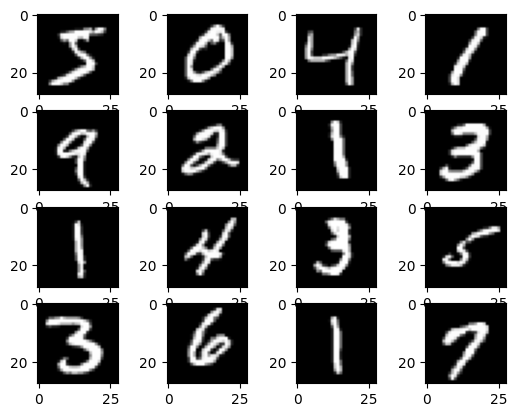

In [ ]:
# a. Please download the MNIST dataset You can receive it through the site or through dataloader
# Load and show any sample images in Python. The input data you use is divided into several sets (training set and test

fig, axs = plt.subplots(4, 4)
for i in range(4):
    for j in range(4):
        axs[i, j].imshow(X_train[i*4+j], cmap='gray')
plt.show()


```
b. Construct a code that distinguishes 10 classes from 0 to 9 from the given MINIST test set using PCA.
(In your code, you should show a set of k coefficients obtained.)
```



In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

# Load the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data.astype(int)
y = mnist.target.astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)

# Choose the number of component and perform dimensionality reduction
numCom = 20
pca = PCA(n_components = numCom).fit(X_train)

# Display the set set of k coefficients obtained
coef = pca.components_
for i in range(numCom):
    print(f"Principal Component {i + 1} coefficients:\n{coef[i]}")

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Principal Component 1 coefficients:
[-3.69584068e-19  2.77006475e-18 -1.48358383e-18  1.86496031e-20
 -4.90532617e-20  1.66791132e-20 -1.91177085e-21  2.62605516e-21
 -1.64052883e-22 -1.11961168e-21  4.15794423e-22 -8.22467087e-25
 -1.07148062e-07 -2.31439814e-06 -2.31439814e-06 -9.64332560e-08
 -1.23177213e-24 -2.59858948e-25 -2.01693511e-25  8.26094070e-26
 -4.83278635e-25  5.56189401e-25  1.67622376e-25  1.18489378e-25
  1.47134995e-25  9.71438167e-26  1.40338523e-26  2.67272270e-26
 -3.28240073e-28 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  2.66595107e-07  5.14528409e-07  5.84607201e-06  2.00669163e-05
  2.54055961e-05  3.96955410e-05  7.08229104e-05  9.94633910e-05
  8.84904721e-05  9.41056218e-05  9.89964503e-05  4.85964498e-05
  7.85551197e-06  2.54693319e-05  1.69272857e-05 -8.09478707e-06
 -8.24522316e-06 -4.72487520e-06 -1.92985288e-06 -1.43423806e-07
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  2.12076373e-06  1.17



```
c. Please show the classification performance in terms of classification test accuracy.
(Use the classifier method you want.) - Random Forest is used
```



In [ ]:
# Perform PCA transformation to the training and testing data
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the classifier (Random Forest in this example)
clf = RandomForestClassifier(n_estimators=15, random_state=666)
clf.fit(X_train_pca, y_train)

# Predictions on the test set
y_pred = clf.predict(X_test_pca)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 93.11%


I have adjusted the parameter (n_estimators) a few times to compare the accuracy.
The higher the n_estimators, the higher the accuracy but the execution time take longer; after serveral tests, 15 gives the most balanced result.

Here're the previous results with different n_estimators adjustments:

100 : 95.33%

50 : 94.81 %

25 : 93.79 %

10 : 92.18 %